### Multi class classification using FFNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Accessing the dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualisation of the training data

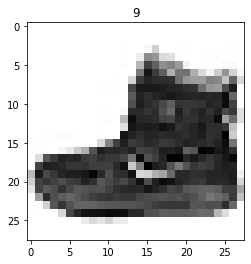

In [ ]:
plt.imshow(X_train[0],'Greys')
plt.title(y_train[0]);

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [ ]:
## Creating a dictionary of fashion accessories
fashion_dict={0:'T-shirt/top',
              1:'Trouser',
              2:'Pullover',
              3:'Dress',
              4:'Coat',
              5:'Sandal',
              6:'Shirt',
              7:'Sneaker',
              8:'Bag',
              9:'Ankle boot'}

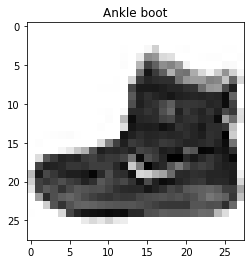

In [ ]:
plt.imshow(X_train[0],'Greys')
plt.title(fashion_dict[y_train[0]]);

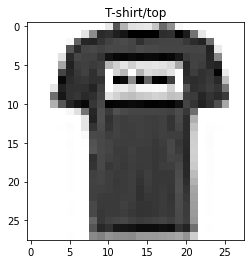

In [ ]:
plt.imshow(X_train[1],'Greys')
plt.title(fashion_dict[y_train[1]]);

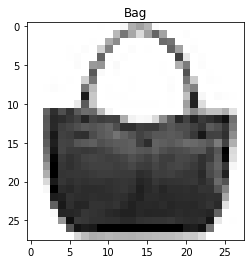

In [ ]:
plt.imshow(X_train[100],'Greys')
plt.title(fashion_dict[y_train[100]]);

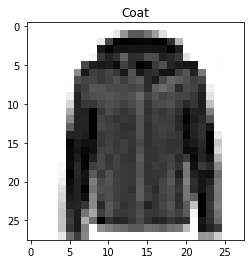

In [ ]:
plt.imshow(X_train[5000],'Greys')
plt.title(fashion_dict[y_train[5000]]);

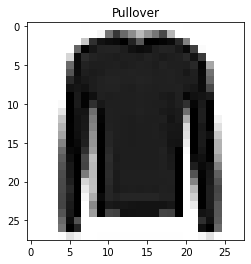

In [ ]:
plt.imshow(X_train[15000],'Greys')
plt.title(fashion_dict[y_train[15000]]);

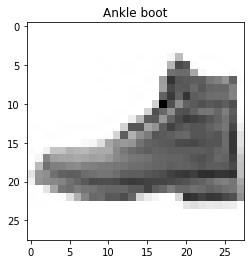

In [ ]:
plt.imshow(X_train[50000],'Greys')
plt.title(fashion_dict[y_train[50000]]);

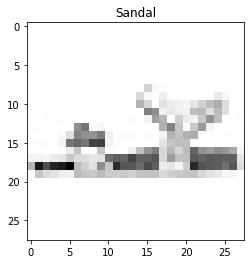

In [ ]:
plt.imshow(X_train[59999],'Greys')
plt.title(fashion_dict[y_train[59999]]);

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
pd.DataFrame(y_train).value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

AttributeError: ignored

## Building the model

In [ ]:
fashion_1=tf.keras.Sequential()
fashion_1.add(tf.keras.layers.Flatten())
fashion_1.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_1.add(tf.keras.layers.Dense(10,activation='softmax'))                                      ## 28*28 = 784inputs and 10 outputs

## flatten- image provided it will split into flatten layer
no activation - linear activation
binary i unit - sigmoid
if we use 2 unit we can use softmax
multi class - activation - softmax
regression - 1unit - Default- linear

## Compiling the model

In [ ]:
fashion_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),    # category index of the most likely matching category
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

## Training the model

In [ ]:
tf.random.set_seed(100)
history=fashion_1.fit(X_train,y_train,epochs=25)
                        #1875=60000/785

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4197 - accuracy: 0.8551
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4247 - accuracy: 0.8540
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4180 - accuracy: 0.8550
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4105 - accuracy: 0.8561
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4119 - accuracy: 0.8588
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8553
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4104 - accuracy: 0.8580
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4175 - accuracy: 0.8557
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4140 - accuracy: 0.8574
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.422

NameError: ignored

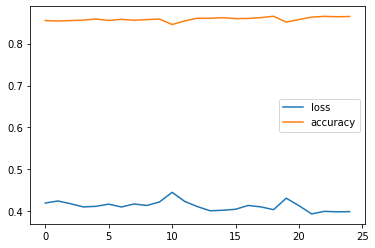

In [ ]:
pd.DataFrame(history.history).plot();

## Evaluation of the  model

In [ ]:
test_loss,test_accuracy=fashion_1.evaluate(X_test,y_test)
print('Test loss:',test_loss,'\nTest Accuracy:',test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6172 - accuracy: 0.8347
Test loss: 0.6172389388084412 
Test Accuracy: 0.8346999883651733


In [ ]:
it is working fine in training but not in testing ....so it is overfitting

## Improve the model

In [ ]:
fashion_2=tf.keras.Sequential()
fashion_2.add(tf.keras.layers.Flatten())
fashion_2.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_2.add(tf.keras.layers.Dense(100,activation='relu')) # added one layer
fashion_2.add(tf.keras.layers.Dense(10,activation='softmax'))

softmax functions are multi-class sigmoids, meaning they are used in determining probability of multiple classes at once.

In [ ]:
fashion_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [ ]:
tf.random.set_seed(100)
history=fashion_2.fit(X_train,y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2530 - accuracy: 0.7698
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4925 - accuracy: 0.8300
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4449 - accuracy: 0.8418
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4187 - accuracy: 0.8517
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3995 - accuracy: 0.8584
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3867 - accuracy: 0.8638
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3741 - accuracy: 0.8682
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3659 - accuracy: 0.8710
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3561 - accuracy: 0.8743
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.342

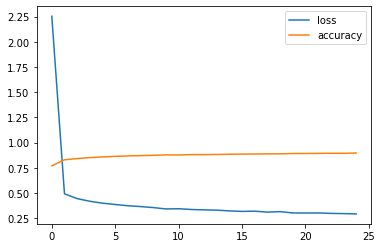

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
test_loss,test_accuracy=fashion_2.evaluate(X_test,y_test)
print('Test loss:',test_loss,'\nTest Accuracy:',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.8618
Test loss: 0.4505595266819 
Test Accuracy: 0.8618000149726868


## model summary

In [ ]:
fashion_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*300+bias100=235500 and so on then total params come

## Plotting of the model

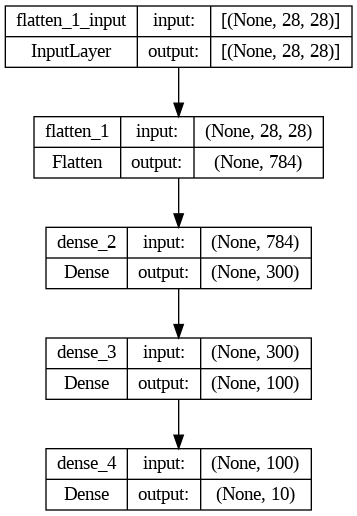

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(fashion_2,show_shapes=True)

## Prediction using the model

In [ ]:
y_pred=fashion_2.predict(X_test)             #10000/32=313
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 2.6400036e-33, ..., 2.0986332e-03,
        1.6008830e-18, 9.9789518e-01],
       [3.1949926e-07, 5.1899717e-11, 9.9960297e-01, ..., 0.0000000e+00,
        2.5369146e-10, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.2010441e-15, 2.0805253e-22, 5.4748295e-22, ..., 1.2092106e-38,
        9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.3020478e-10, 0.0000000e+00, 3.7743940e-11, ..., 4.3371236e-03,
        1.1680145e-07, 7.4792589e-04]], dtype=float32)

In [ ]:
y_pred[0]

array([0.0000000e+00, 0.0000000e+00, 2.6400036e-33, 0.0000000e+00,
       0.0000000e+00, 6.2328245e-06, 7.2520545e-28, 2.0986332e-03,
       1.6008830e-18, 9.9789518e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])              #arg max because softmax activation gives max
                                  #  maximum value from a target function.

9

Text(0.5, 1.0, 'Ankle boot')

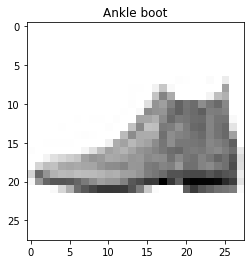

In [ ]:
plt.imshow(X_test[0],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[0])])

Text(0.5, 1.0, 'Coat')

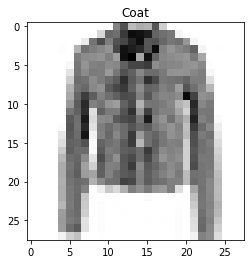

In [ ]:
plt.imshow(X_test[10],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[10])])

Text(0.5, 1.0, 'Bag')

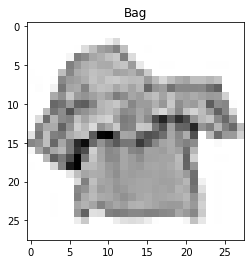

In [ ]:
plt.imshow(X_test[5990],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[5990])])

Text(0.5, 1.0, 'Ankle boot')

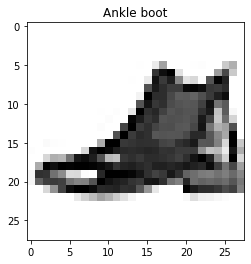

In [ ]:
plt.imshow(X_test[1230],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[1230])])

Text(0.5, 1.0, 'Pullover')

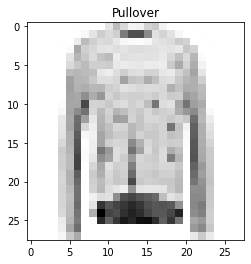

In [ ]:
plt.imshow(X_test[4950],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[4950])])